In [1]:
import numpy as np
import time
from scipy import misc, ndimage
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from data_loader import *
from data_visualizer import *

np.random.seed(2018)

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, f1_score
from keras.models import load_model
from keras.utils import plot_model
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ReduceLROnPlateau
from keras_sequential_ascii import keras2ascii
from sklearn.metrics import accuracy_score, f1_score

Using TensorFlow backend.


In [ ]:
#inicializace dat
x_train, y_train = load_data()
x_test, y_test = load_test_data()
print(x_train.shape)
print(x_test.shape)

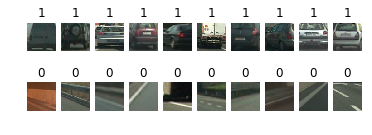

In [3]:
#zobrazení příkladů trénovacího souboru
visualize_examples(x_train, y_train, 10)

In [4]:
#změna matice
x_train, x_test = change_matrix(x_train, x_test)

Dimenze trénovacího setu X:(6625, 12288)
Dimenze trénovacího setu Y:(6625,)
Dimenze testovacího setu X:(700, 12288)
Dimenze testovacího setu Y:(700,)


In [1]:
# vytvoření modelu neuronové sítě
def train_model( x_train, y_train, epochs, batch_size, optimizer):
    
    #inicializace parametrů
    epochs_n = epochs
    batch_size_n = batch_size 
    unit_in_layer = 200
    
    #vytvoření modelu
    model = Sequential()
    model.add(Dense(units=400, activation = "relu", input_dim = x_train.shape[1]))
    Dropout(0.2)
    model.add(Dense(units=350,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=300,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=250,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=200,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=150,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=100,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=50,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=25,activation="relu"))
    Dropout(0.2)
    model.add(Dense(units=1,activation="sigmoid"))

    #nastavení optimizeru
    if (optimizer == 'sgd'):
        sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
        model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ["accuracy"])
        
    elif (optimizer == 'adam'):
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

    start = time.time()
    # vytvoření logu trénování
    csv_logger = CSVLogger('nn_deep_10_sgd_pyramid_50e.log')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr = 0.001)
    # trénování modelu model.fit()
    history = model.fit(x_train, y_train, validation_split = 0.2,  epochs = epochs_n, batch_size = batch_size_n,
                        verbose = 1, callbacks = [csv_logger, reduce_lr])
    end = time.time() 
    
    # vytiskne přehled modelu
    print("Model took %0.2f seconds to train"%(end - start))
    print(model.summary())
    keras2ascii(model)
    print_graphs(history)
    
    # uložení modelu jako .h5
    model.save(r'C:\Users\Petr\Desktop\Bakalářská práce\Neural_networks\deep_nn\nn_deep_10_sgd_pyramid_50e.h5')
    
    return history, model

Train on 5304 samples, validate on 1326 samples
Epoch 1/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.5754 - acc: 0.7917 - val_loss: 0.4653 - val_acc: 0.8017
Epoch 2/50
5304/5304 [==============================] - 13s 2ms/step - loss: 0.3835 - acc: 0.8431 - val_loss: 0.2896 - val_acc: 0.9087
Epoch 3/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.3065 - acc: 0.8833 - val_loss: 0.2193 - val_acc: 0.9231
Epoch 4/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.2544 - acc: 0.9055 - val_loss: 0.2031 - val_acc: 0.9261
Epoch 5/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.2307 - acc: 0.9121 - val_loss: 0.1785 - val_acc: 0.9374
Epoch 6/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.2029 - acc: 0.9250 - val_loss: 0.1967 - val_acc: 0.9253
Epoch 7/50
5304/5304 [==============================] - 14s 3ms/step - loss: 0.2169 - acc: 0.9214 - val_loss: 0.2214 - val_acc: 0.9193
Epoch 8

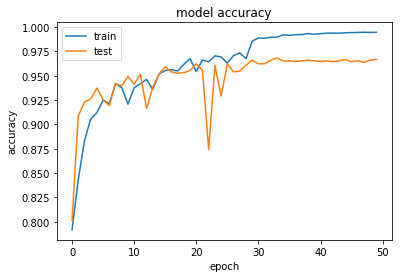

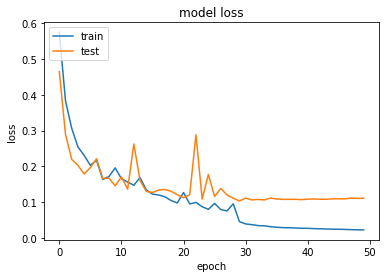

In [24]:
# trénování modelu
history, model = train_model(x_train, y_train, 50, 32, 'sgd')

In [31]:
# vytvoření modelu jako obrázku
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, to_file='model_plot_10_200u_layers.png', show_shapes=True, show_layer_names=True)

In [67]:
#odstranit stávající model
del model

In [63]:
#načtení uloženého modelu
model = load_model('nn_deep_10_adam_pyramid_200e.h5')

In [6]:
# metoda pro udělání predikce na testovacím souboru
def prediction_test(model, x_test, y_test):
    
    test_predictions = model.predict(x_test)
    test_predictions = np.round(test_predictions)

    # vrácení přesnosti predikce
    accuracy = accuracy_score(y_test, test_predictions)
    print("Přesnost testovacího datasetu: " + str(accuracy * 100) + "%")
    
    return test_predictions

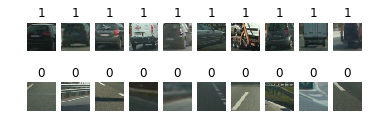

In [15]:
# zobrazení testovacích dat
visualize_examples(x_test, y_test, 10)

In [64]:
# predikce testovacího souboru
test_predictions = prediction_test(model, x_test, y_test)

Přesnost testovacího setu: 94.42857142857143%


počet špatných odhadů: 39


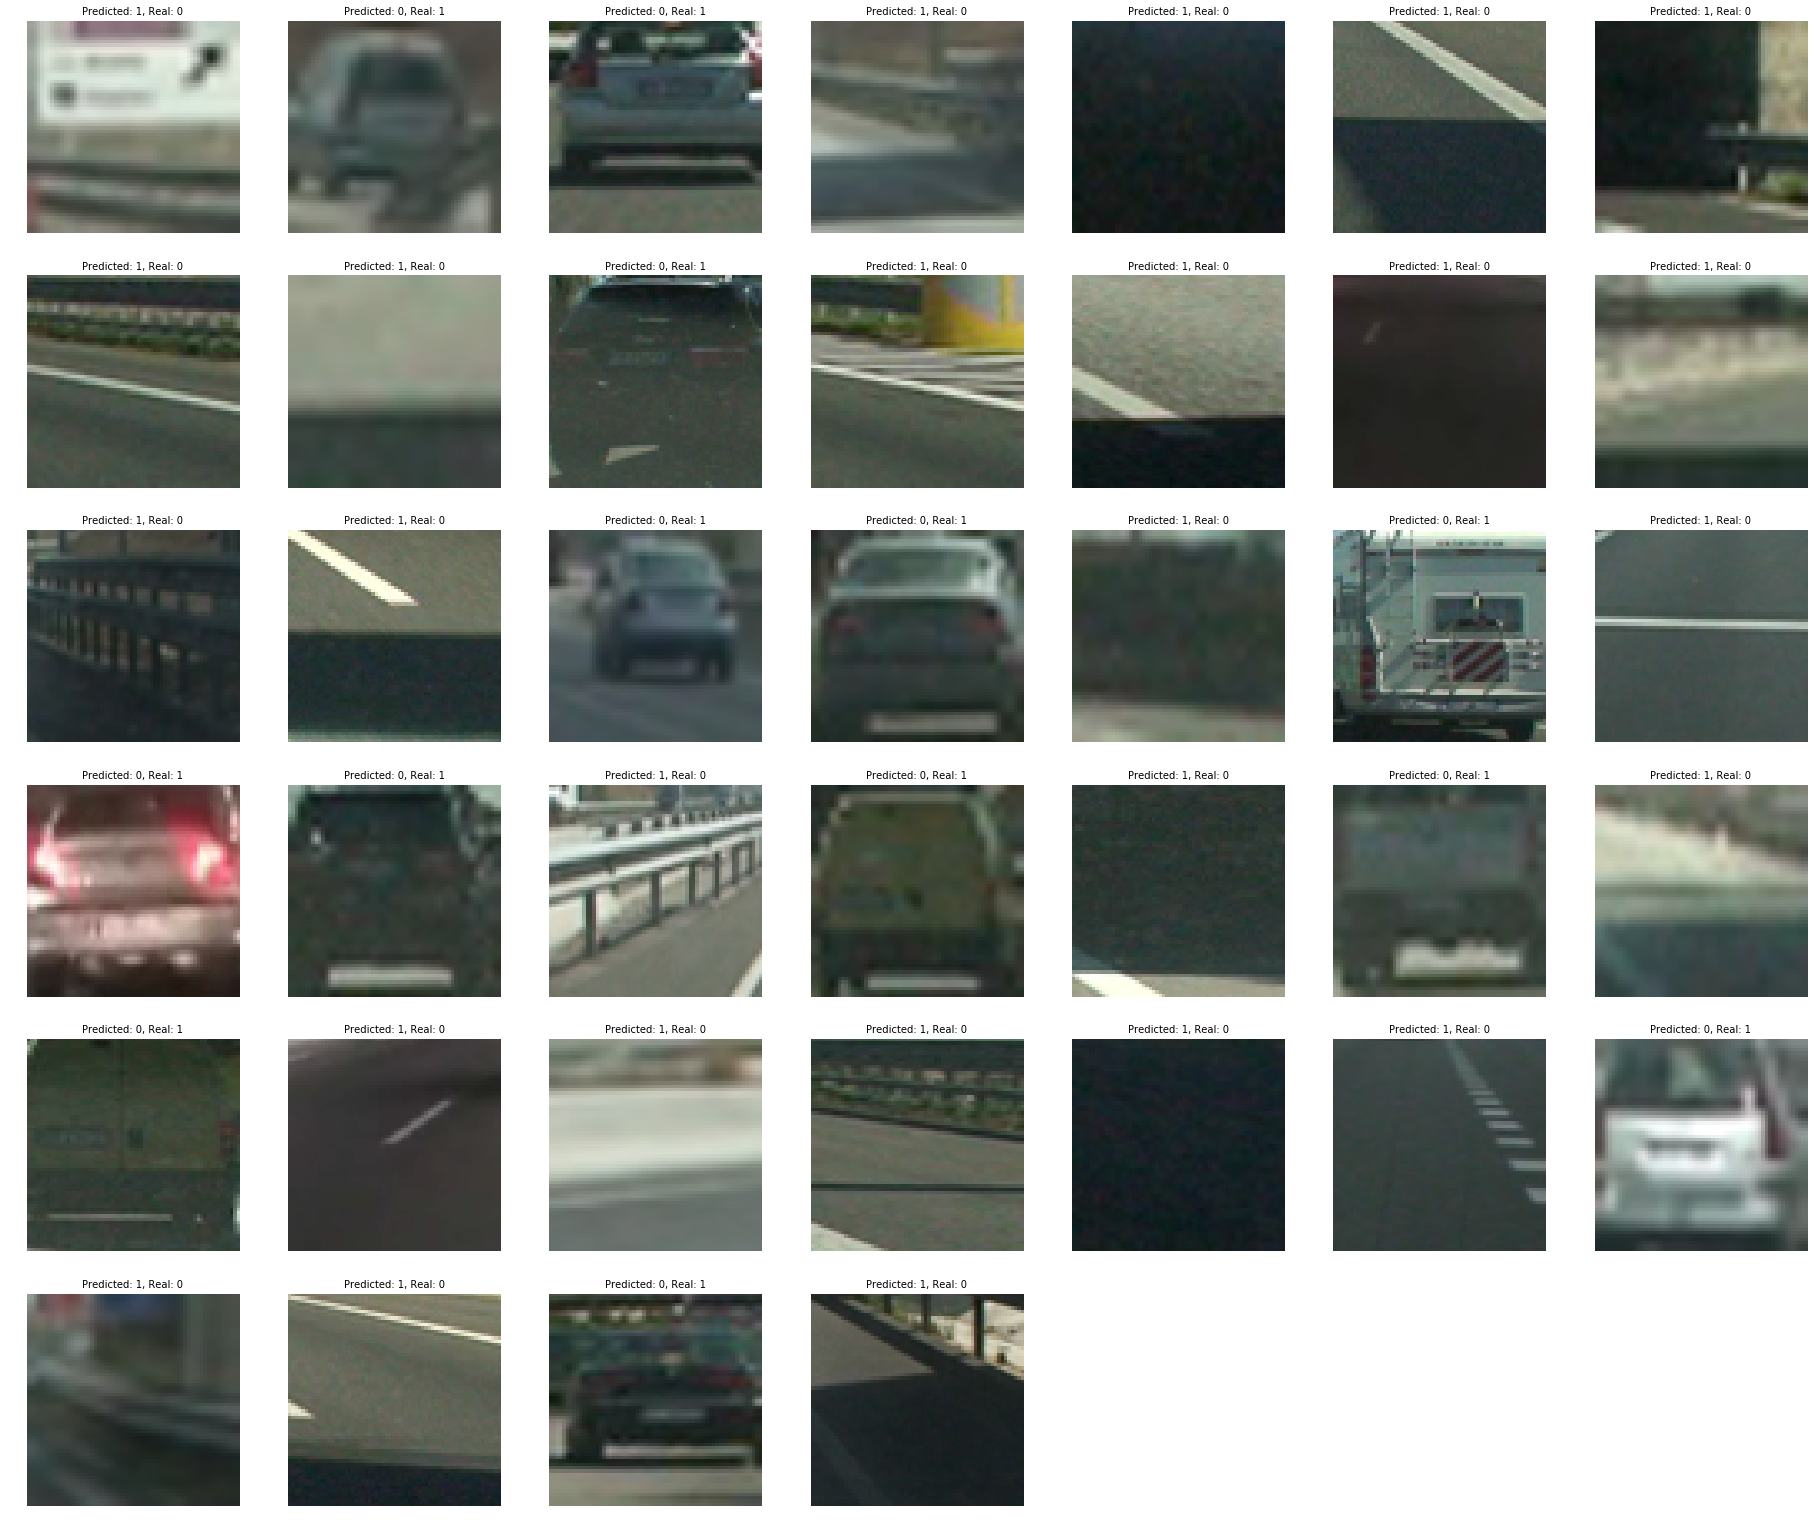

In [65]:
# zobrazení nesprávně označených obrázků
visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())